# Least Squares Approxiamtion

We want to consider how much our differs from a model function. Without getting into the super detailed math behind this, we basically want to:

  1. Calculate the pointwise errors between our data and a model with "test" parameters.

  2. Instead of just the absolute errors, we want to consider the absolute errors squared. This just makes slight differences in error more apparent.

  3. Maybe there are other parameters for our model function that reduce the error

Explicit example: Consider a set of data points $(x_n, y_n)$ and a model function $f(x) = m\cdot x+b$. The paremeters here are $m$ and $b$. We will only every evaluate the model function at the $x_n$ values supplied in the data. Explicitly, the **least squared error** (LSE) is a function given as:

<center>$\text{LSE}(m, b)=\sum\limits_{i = 1}^n |y_n - f(x_n, m, b)|^2 = \sum\limits_{i = 1}^n |y_n - (m\cdot x_n + b)|^2$</center>

Notice that the Least Squared Error is really a function of the parameters ($m$ and $b$ in this case) since each $x_n$ and $y_n$ are known values from the data set.

Let's test this in code.

In [ ]:
import numpy as np

# First we define a function that calculates the LSE for a line

def LSE_line(m, b, X, Y):
  """Prints what the animals name is and what sound it makes.

     If the argument `sound` isn't passed in, the default Animal
     sound is used.

     Parameters
     ----------
     m : float
         parameter for the model function that represents slope

     b : float
         parameter for the model function that represents intercept

     X : array
         independent variable in dataset

     y: array
         dependent variable in dataset

     """

  error = 0  # start the running sum with zero

  for i in range(len(X)):
    error += np.abs(Y[i] - (m*X[i] + b))**2  # each term in the sum

  return error  # return the total error that has been summed

Let's look at a sample dataset available online at the following URL:
https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/poverty/index.txt

In [ ]:
import pandas as pd

data = pd.read_csv('https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/poverty/index.txt', delimiter='\t') # delimiter is the thing that separates the columns in the txt file (\t = tab in this case)
data.head(5)

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


Our LSE is given as: 1816.6299999999997


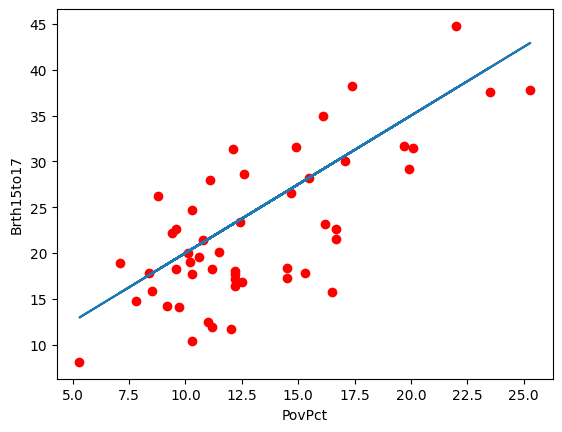

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['PovPct'], data['Brth15to17'], color = 'red')
plt.xlabel('PovPct')
plt.ylabel('Brth15to17')

# We will make a guess for m and b just by looking first. Let's say m = 1.5 and b = 5
m = 1.5
b = 5

# Let's calculate the error for these model function parameters
lse = LSE_line(m, b, data['PovPct'], data['Brth15to17'])
print('Our LSE is given as:', lse)

# Let's plot this estimate to see what it looks like
plt.plot(data['PovPct'], m*data['PovPct'] + b)
plt.show()

It seems like our guess could have been better. Let's do the same procedure with $m = 2, b = 0$

Our LSE is given as: 2665.7599999999998


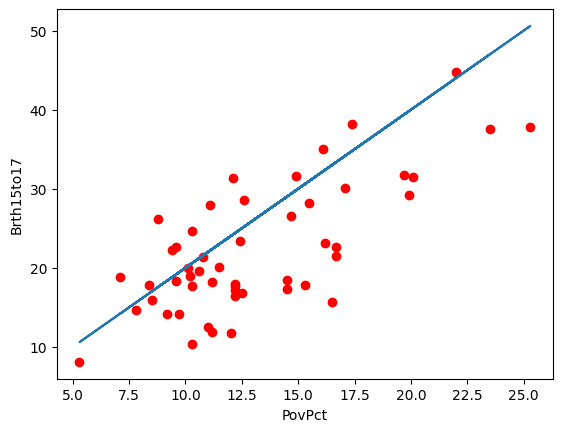

In [ ]:
plt.scatter(data['PovPct'], data['Brth15to17'], color = 'red')
plt.xlabel('PovPct')
plt.ylabel('Brth15to17')

m = 2.0
b = 0

# Let's calculate the error for these model function parameters
lse = LSE_line(m, b, data['PovPct'], data['Brth15to17'])
print('Our LSE is given as:', lse)

# Let's plot this estimate to see what it looks like
plt.plot(data['PovPct'], m*data['PovPct'] + b)
plt.show()

Notice that our LSE in this second guess was higher, so we would say that this second approximation is not as good as the first. Just to show the point, we will "brute force" our way to a good estimate. That is, we are going to try many combinations of $m$ and $b$ and see how small we can make the LSE.

In [ ]:
m_values = np.linspace(0, 5, 20)
b_values = np.linspace(-10, 10, 20)

LSE_dict = {}

for m in m_values:
  for b in b_values:
    LSE_dict[LSE_line(m, b, data['PovPct'], data['Brth15to17'])] = m, b

import pprint
pprint.pprint(LSE_dict) # This prints out our "dictionary" that has "key-value" pairs of the form (LSE, (m, b)). That is, there is an error value corresponding to a combination of m and b

{1516.8203878116346: (1.3157894736842104, 4.7368421052631575),
 1542.6818836565092: (1.3157894736842104, 5.789473684210526),
 1548.3062603878113: (1.5789473684210527, 1.5789473684210513),
 1603.8852077562321: (1.5789473684210527, 0.5263157894736832),
 1603.9782825484765: (1.3157894736842104, 3.6842105263157894),
 1605.7467036011083: (1.5789473684210527, 2.6315789473684212),
 1615.135069252078: (1.0526315789473684, 8.94736842105263),
 1620.852520775623: (1.0526315789473684, 7.894736842105264),
 1681.562770083102: (1.3157894736842104, 6.842105263157894),
 1715.310138504155: (1.8421052631578947, -1.578947368421053),
 1722.4370083102494: (1.0526315789473684, 10.0),
 1739.3101385041555: (1.8421052631578947, -2.6315789473684212),
 1739.5893628808867: (1.0526315789473684, 6.842105263157894),
 1772.4835457063712: (1.5789473684210527, -0.526315789473685),
 1776.2065373961223: (1.5789473684210527, 3.6842105263157894),
 1804.1555678670356: (1.3157894736842104, 2.6315789473684212),
 1804.329529085

In [ ]:
# We can obtain the minimum error (key) from this dictionary as follows

min_LSE = min(LSE_dict)

min_LSE

1516.8203878116346

Now that we have a prospective minimum error with a corresponding parameter set $(m, b)$ we can plot this new estimate against the data.

Our LSE is given as: 1516.8203878116346 for (m, b) = (1.3157894736842104, 4.7368421052631575)


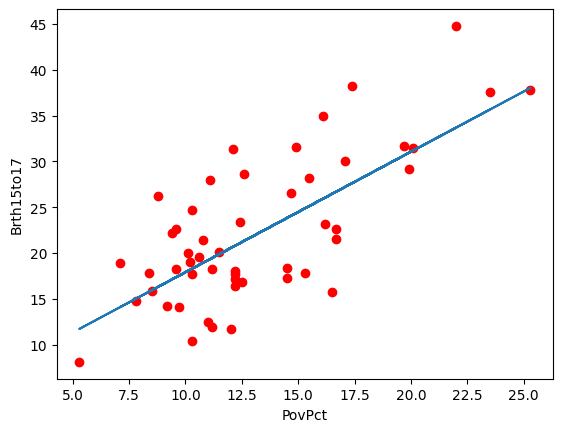

In [ ]:
plt.scatter(data['PovPct'], data['Brth15to17'], color = 'red')
plt.xlabel('PovPct')
plt.ylabel('Brth15to17')


m, b = LSE_dict[min_LSE] # unpack the value associated with the minumim error key

# Let's calculate the error for these model function parameters
lse = LSE_line(m, b, data['PovPct'], data['Brth15to17'])
print('Our LSE is given as:', lse, 'for (m, b) =', str((m, b)))

# Let's plot this estimate to see what it looks like
plt.plot(data['PovPct'], m*data['PovPct'] + b)
plt.show()

# SciPy Optimize

We will now attempt to get the same results using the much more useful scipy.optimize. Documentation for the curve_fit function can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). The most important features will be made apparent in the following block of code.

In [ ]:
import scipy.optimize as opt

# We need to define a literal function in python for our model "mathematical" function to fit to our data
# The inputs to this python function must be the independent variable followed by the model function parameters
def model(x, m, b):
  return m*x+b

x = data['PovPct']
y = data['Brth15to17']

param, param_cov = opt.curve_fit(model, x, y) # This function returns 2 things - hence the two comma-separated values on the left of the equals sign

# DO NOT WORRY ABOUT param_cov. This is a matrix that represents the covariance of the parameters of the model function.
# Your only concern is the first return value (here called param). This is a list of the optimized parameters that best fit your data

print(param)

[1.3733454  4.26729264]


Notice that this prints out a list of two values. The values in this list will match the order of the python funciton inputs you defined, so for our case it has the form \[m, b\]. If we instead said:


```
def model(x, b, m):
```
We would have params = [b, m].

Also notice that our brute force approximation to find the minimum least squares error has given similar results to the scipy function:

SciPy: \[1.3733454, 4.26729264\]

Ours : \[1.3157894736842104, 4.7368421052631575\]


We will see if we can make a better approximation by considering more points, but first let's see how these parameters fit our data.


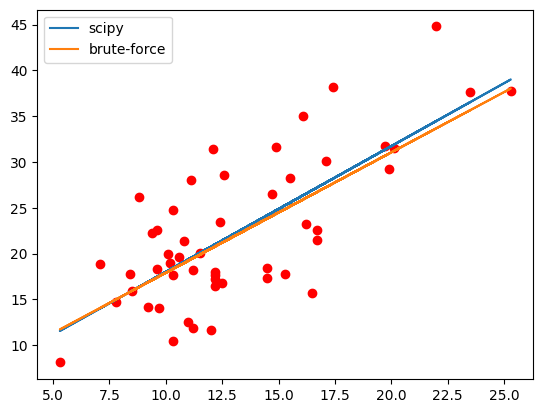

In [ ]:
plt.plot(x, model(x, param[0], param[1]), label = 'scipy')
plt.plot(x, model(x, m, b), label = 'brute-force')
plt.scatter(x, y, color = 'red')
plt.legend()
plt.show()

In [ ]:
# Let's consider more points than before to see if we find a better brute-force fit

m_values = np.linspace(0, 5, 150) # Play with the last number in these parentheses to consider more m points
b_values = np.linspace(0, 5, 150) # Play with the last number in these parentheses to consider more b points

LSE_dict = {}

for m in m_values:
  for b in b_values:
    LSE_dict[LSE_line(m, b, data['PovPct'], data['Brth15to17'])] = m, b

min_LSE = min(LSE_dict)

LSE_dict[min_LSE] # See if your values more closely match those from scipy

(1.3758389261744965, 4.228187919463087)

# Visualize the Problem

Here may be a useful place to stop and reconsider what we are trying to do. We have a function (the least squares error function) whose value we wish to minimize. Now, the error function has as many dimensions as parameters for your model function, so this is generally a question for multivariable calculus.

Example model fuction:
<center>$f(x) = a\cdot\text{sin}(b\cdot x) + c$</center>

has three parameters $a, b,$ and $c$. Thus, our error function is of the form $\text{LSE}(a, b, c)$. We want to minimize this function. Now, none of you have taken multivariable calculus, but the principle remains the same. We need to take derivatives and find where the derivative is zero. Generally we call this **Steepest Gradient Descent**, but it suffices to just imagine the 1-d case and get an intuition that the same happens in the other dimensions.

Next we will visualize the *surface* that represents the LSE for a line with our data. One axis will be for $m$ values, and the other for $b$.

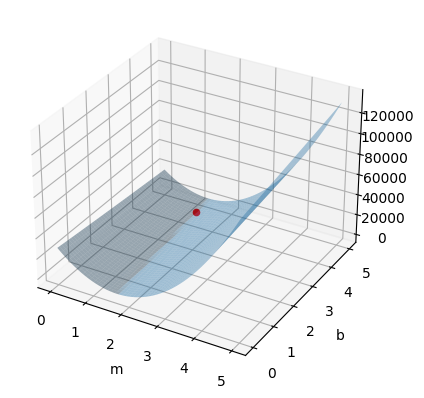

In [ ]:
from mpl_toolkits import mplot3d

M, B = np.meshgrid(m_values, b_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, LSE_line(M, B, x, y), alpha = 0.4)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.scatter([param[0]], [param[1]], [LSE_line(param[0], param[1], x, y)], color = 'red')

Here I have also plotted the minimum point according to the scipy results. It is hard to see on this non-interactive graph that this is the true minimum, so let's instead look at a 2D plot with the values of LSE represented as colors.



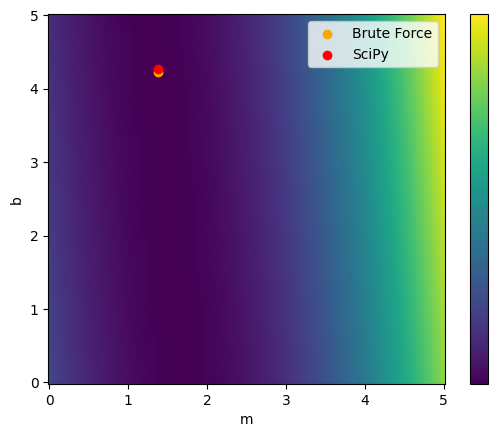

In [ ]:
plt.pcolormesh(M, B, LSE_line(M, B, x, y))
plt.xlabel('m')
plt.ylabel('b')
plt.scatter(LSE_dict[min_LSE][0], LSE_dict[min_LSE][1], color = 'orange', label = 'Brute Force')
plt.scatter(param[0], param[1], color = 'red', label = 'SciPy')
ticks = np.linspace(LSE_line(M, B, x, y).min(), LSE_line(M, B, x, y).max(), 8, endpoint=True)
plt.legend()
cbar = plt.colorbar(ticks = ticks)

This is not really any more helpful in seeing that the red point indeed corresponds to a minimum, but I think we can safely assume it is.

# Exponential

Now let's consider the same process but with an exponential function of the form

<center>$f(x) = a\cdot e^{b\cdot x}$</center>

Where we now have the parameters $a$ and $b$. We first need to define our LSE function for the exponential.

In [ ]:
def LSE_exp(a, b, X, Y):
  error = 0  # start the running sum with zero

  for i in range(len(X)): # for every index in our list
    error += np.abs(Y[i] - (a*np.exp(b*X[i])))**2  # each term in the sum (error for each data point)

  return error  # return the total error

Now we calculate our "brute force" approach for many values of $a$ and $b$.

In [ ]:
a_values = np.linspace(0, 15, 50)
b_values = np.linspace(0, 5, 50)

LSE_dict = {} # create an empty "dictionary"

for a in a_values: # for every a value
  for b in b_values: # and for every b value
    LSE_dict[LSE_exp(a, b, data['PovPct'], data['Brth15to17'])] = a, b  # create a key for the error pointing to the "tuple" (or non-modifiable list) of parameters that gave that error

import pprint # a library used to "pretty print" different python objects (try using normal print to see the difference)
pprint.pprint(LSE_dict) # This prints out our "dictionary" that has "key-value" pairs of the form (LSE, (m, b)).

{3037.4817733902532: (4.591836734693878, 0.10204081632653061),
 3101.982477166316: (4.8979591836734695, 0.10204081632653061),
 3193.7026428079444: (4.285714285714286, 0.10204081632653061),
 3387.204754136136: (5.204081632653061, 0.10204081632653061),
 3570.645085419392: (3.979591836734694, 0.10204081632653061),
 3893.148604299712: (5.510204081632653, 0.10204081632653061),
 4168.309101224595: (3.673469387755102, 0.10204081632653061),
 4619.814027657044: (5.816326530612245, 0.10204081632653061),
 4986.694690223556: (3.36734693877551, 0.10204081632653061),
 5567.2010242081315: (6.122448979591837, 0.10204081632653061),
 5939.56: (15.0, 0.0),
 6025.801852416272: (3.0612244897959187, 0.10204081632653061),
 6171.727013744272: (14.693877551020408, 0.0),
 6413.452544773009: (14.387755102040817, 0.0),
 6664.7365930862115: (14.081632653061225, 0.0),
 6735.309593952973: (6.428571428571429, 0.10204081632653061),
 6925.579158683882: (13.775510204081632, 0.0),
 7195.980241566014: (13.46938775510204, 

You can see how large the error values become for some functions and data sets. There are many "wasted" calculations on points that are clearly not the smallest value i.e. we find a value larger than one we already found. This is fixed by Steepest Gradient Descent which again will not be covered here.

Let's check the brute force values obtained.

In [ ]:
min_LSE = min(LSE_dict)

LSE_dict[min_LSE]

(4.591836734693878, 0.10204081632653061)

# Scipy Optimize for Exponential

Let's calculate optimized parameter values using scipy in a very similar way as before for the linear case.

In [ ]:
import scipy.optimize as opt

# We need to define a literal function in python for our model "mathematical" function to fit to our data
# The inputs to this python function must be the independent variable followed by the model function parameters
def model(x, a, b):
  return a*np.exp(b*x)

x = data['PovPct']
y = data['Brth15to17']

param, param_cov = opt.curve_fit(model, x, y) # This function returns 2 things - hence the two comma-separated values on the left of the equals sign

# DO NOT WORRY ABOUT param_cov. This is a matrix that represents the covariance of the parameters of the model function.
# Your only concern is the first return value (here called param). This is a list of the optimized parameters that best fit your data

print(param)

[10.48721578  0.05524764]


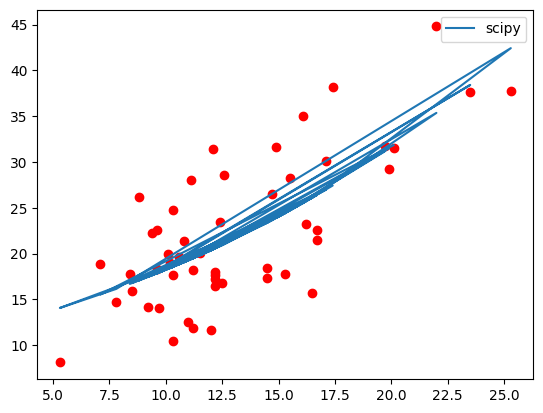

In [ ]:
plt.plot(x, model(x, param[0], param[1]), label = 'scipy')
plt.scatter(x, y, color = 'red')
plt.legend()
plt.show()

---
# Plotting Caveat

You will see that our connected line graph is very scattered. This is because plt.plot connects each consecutive point in the dataset (regardless of order). If our independent variable is not sorted, we get this effect where we go back and forth between points for bigger and smaller values of our independent variable.

We didn't need to do this before since any two (non-consecutive) points connected by a straight line, that lie on a linear plot, draw out the same line. **You might need to reread this sentence a few times to fully understand what I mean**

Perhaps the best way to see what I mean is to consider the red scatter plot of our data. Just look at it. When you look at it, you interpret it as being plotted from left to right. **That is not how the computer sees it.** The computer plots each of these points in the order that appear in the dataset. By that same logic, the computer connects points in the order that appear in the dataset.

We use the same order of "x-values" for the model function plot as the order that created the scatter plot. If the x-values are not ordered, we aren't connecting points "along" the curve from left to right, but perhaps simply connecting values on complete other ends of the curve by a stright line.

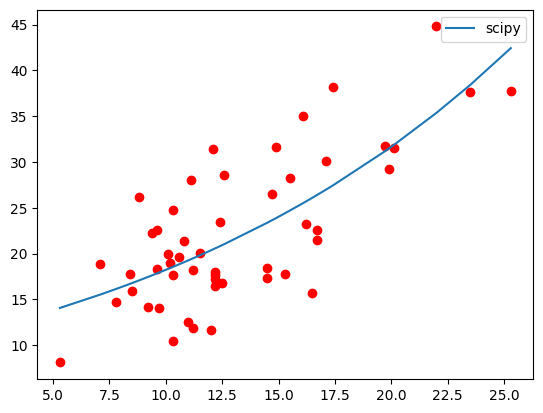

In [ ]:
data_sorted = data.sort_values('PovPct') # This sorts the dataset by the column specified. This has been our "x-value" throughout this notebook

x = data_sorted['PovPct']       # Now we have our ordered data
y = data_sorted['Brth15to17']

plt.plot(x, model(x, param[0], param[1]), label = 'scipy') # use the same exact code as before, except now with an ordered dataset
plt.scatter(x, y, color = 'red')
plt.legend()
plt.show()

**Look at the difference!!!**

---

# Visualizing our Results

First we will compare our brute force results with the scipy results.

Brute force (4.591836734693878, 0.10204081632653061) 
Scipy [10.48721578  0.05524764]


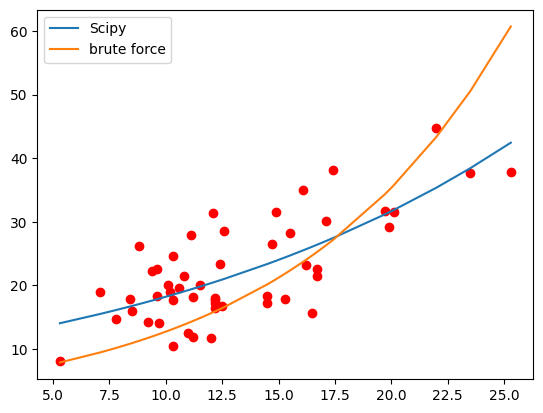

In [ ]:
print('Brute force', LSE_dict[min_LSE], '\nScipy', param)

plt.scatter(x, y, color = 'red')
plt.plot(x, model(x, param[0], param[1]), label = 'Scipy')
plt.plot(x, model(x, LSE_dict[min_LSE][0], LSE_dict[min_LSE][1]), label = 'brute force')
plt.legend()
plt.show()

These aren't exactly close so let's consider more points.

Brute force (8.657718120805368, 0.06711409395973154) 
Scipy [10.48721578  0.05524764]


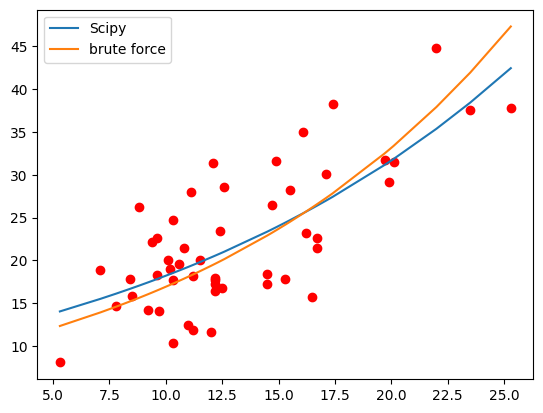

In [ ]:
a_values = np.linspace(0, 15, 150)
b_values = np.linspace(0, 5, 150)

LSE_dict = {} # create an empty "dictionary"

for a in a_values: # for every a value
  for b in b_values: # and for every b value
    LSE_dict[LSE_exp(a, b, x, y)] = a, b  # create a key for the error pointing to the "tuple" (or non-modifiable list) of parameters that gave that error

min_LSE = min(LSE_dict)

print('Brute force', LSE_dict[min_LSE], '\nScipy', param)

plt.scatter(x, y, color = 'red')
plt.plot(x, model(x, param[0], param[1]), label = 'Scipy')
plt.plot(x, model(x, LSE_dict[min_LSE][0], LSE_dict[min_LSE][1]), label = 'brute force')
plt.legend()
plt.show()

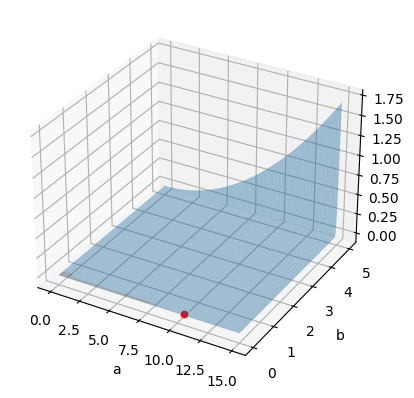

In [ ]:
from mpl_toolkits import mplot3d

A, B = np.meshgrid(a_values, b_values) # Create a grid for the a and b values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(A, B, LSE_exp(A, B, x, y), alpha = 0.4) # plot the surface
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.scatter([param[0]], [param[1]], [LSE_exp(param[0], param[1], x, y)], color = 'red')

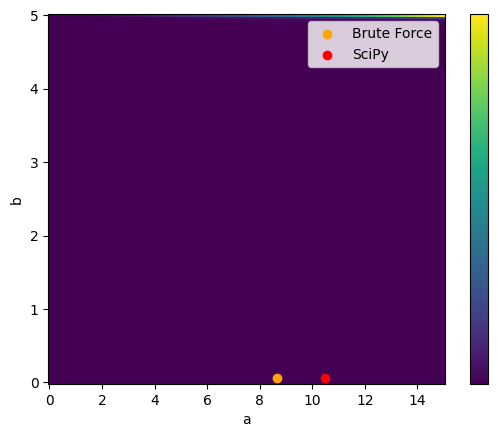

In [ ]:

min_LSE = min(LSE_dict)

LSE_dict[min_LSE] # See if your values more closely match those from scipy

plt.pcolormesh(A, B, LSE_exp(A, B, x, y))
plt.xlabel('a')
plt.ylabel('b')

plt.scatter(LSE_dict[min_LSE][0], LSE_dict[min_LSE][1], color = 'orange', label = 'Brute Force')  # Place the optimal parameter
plt.scatter(param[0], param[1], color = 'red', label = 'SciPy')

ticks = np.linspace(LSE_exp(A, B, x, y).min(), LSE_exp(A, B, x, y).max(), 100, endpoint=True)
plt.legend()
cbar = plt.colorbar(ticks = ticks)

The plots here are not very revealing since the error values explode to values on the order of $10^{112}$. Using the values given from scipy, we will "zoom in" around the optimal point for our brute force method. and try to visualize again. We will zoom in on the frame defined by the intervals a=[10, 11] and b=[0, 0.1].

You will notice that the brute force method within such a small window gives results very similar to scipy which is kind of obvious.

Brute force (10.523489932885907, 0.055033557046979875) 
Scipy [10.48721578  0.05524764]


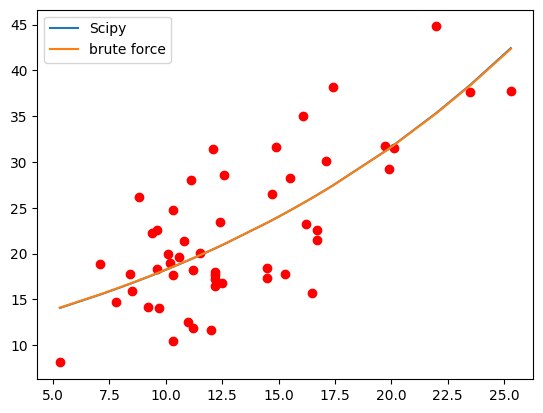

In [ ]:
a_values = np.linspace(10, 11, 150)
b_values = np.linspace(0, 0.1, 150)

LSE_dict = {} # create an empty "dictionary"

for a in a_values: # for every a value
  for b in b_values: # and for every b value
    LSE_dict[LSE_exp(a, b, x, y)] = a, b  # create a key for the error pointing to the "tuple" (or non-modifiable list) of parameters that gave that error

min_LSE = min(LSE_dict)

print('Brute force', LSE_dict[min_LSE], '\nScipy', param)

plt.scatter(x, y, color = 'red')
plt.plot(x, model(x, param[0], param[1]), label = 'Scipy')
plt.plot(x, model(x, LSE_dict[min_LSE][0], LSE_dict[min_LSE][1]), label = 'brute force')
plt.legend()
plt.show()

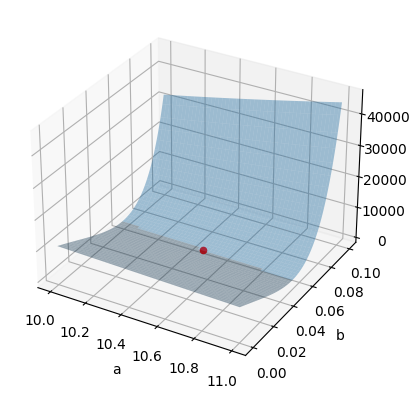

In [ ]:
from mpl_toolkits import mplot3d

A, B = np.meshgrid(a_values, b_values) # Create a grid for the a and b values

x = data['PovPct']
y = data['Brth15to17']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(A, B, LSE_exp(A, B, x, y), alpha = 0.4) # plot the surface
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.scatter([param[0]], [param[1]], [LSE_exp(param[0], param[1], x, y)], color = 'red')

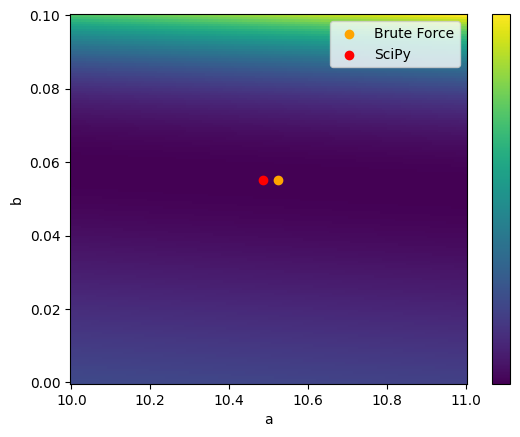

In [ ]:
min_LSE = min(LSE_dict)

LSE_dict[min_LSE] # See if your values more closely match those from scipy

plt.pcolormesh(A, B, LSE_exp(A, B, x, y))
plt.xlabel('a')
plt.ylabel('b')

plt.scatter(LSE_dict[min_LSE][0], LSE_dict[min_LSE][1], color = 'orange', label = 'Brute Force')  # Place the optimal parameter
plt.scatter(param[0], param[1], color = 'red', label = 'SciPy')

ticks = np.linspace(LSE_exp(A, B, x, y).min(), LSE_exp(A, B, x, y).max(), 100, endpoint=True)
plt.legend()
cbar = plt.colorbar(ticks = ticks)

# LSE Playground

Here will be placed model code that will enable you to try and curve fit any function you can think of. The default method of scipy.optimize is **least squares approximation** although the method of finding the minimum is quite different from what we covered.

## Imported Data

I will put here, again the code to import a csv dataset. I will use the same dataset used throughout this notebook, but feel free to use your own.

In [285]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt


def model_1(x, a, b, c):
  # return a*np.log(b*x) + c
  # return a*np.sin(b*x) + c
  return a*x**2 + b*x + c

In [286]:
import pandas as pd

data = pd.read_csv('https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/poverty/index.txt', delimiter='\t') # delimiter is the thing that separates the columns in the txt file (\t = tab in this case)
data.head(5)

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


Pick any two columns to try and find a relation. Remember to sort the data based on the independent variable.

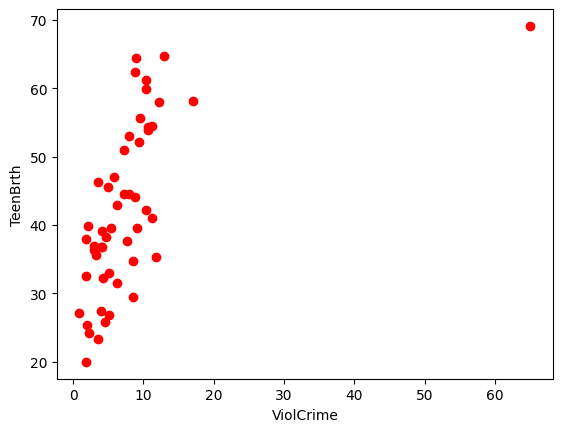

In [287]:
indep_var = 'ViolCrime'
dep_var = 'TeenBrth'

data_sorted = data.sort_values(indep_var, ascending = True).copy()

x = data_sorted[indep_var]
y = data_sorted[dep_var]

plt.scatter(x, y, color = 'red')
plt.xlabel(indep_var)
plt.ylabel(dep_var)
plt.show()

Let's optimize the parameters.

In [288]:
param, param_cov = opt.curve_fit(model_1, x, y)

param

array([-0.03311322,  2.83576887, 24.59116034])

See how well your model matches the data. Really we should plot the model over a domain with many more points than the ones given in the dataset if we want the model to be predictive.

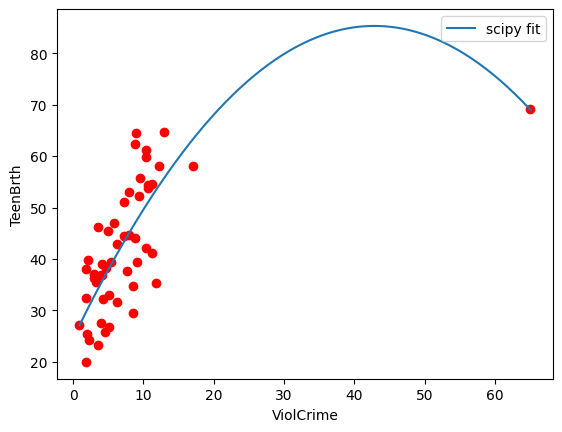

In [289]:
plt.scatter(x, y, color = 'red')

model_domain = np.linspace(np.min(x), np.max(x), len(x)*5) # You can edit this domain as you please
plt.plot(model_domain, model_1(model_domain, *param), label = 'scipy fit')
plt.xlabel(indep_var)
plt.ylabel(dep_var)
plt.legend()
plt.show()

---
## Manufactured "Noisy" Data

Here we will simply add "noise" to whatever model function is defined above to see how noise can affect curve fitting. That is, we assume some experiment where the actual process at hand follows a particular model function (think projectile motion), but where there are errors in measurement either due to the device or to human error. How does this noise affect the measured parameters i.e. gravity, current, spring constant, etc.

In [391]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt


def model_2(x, a, b, c):
  return a*np.log(b*x) + c
  # return a*np.sin(b*x)*np.exp(c*x) + d
  # return a*x**2 + b*x + c

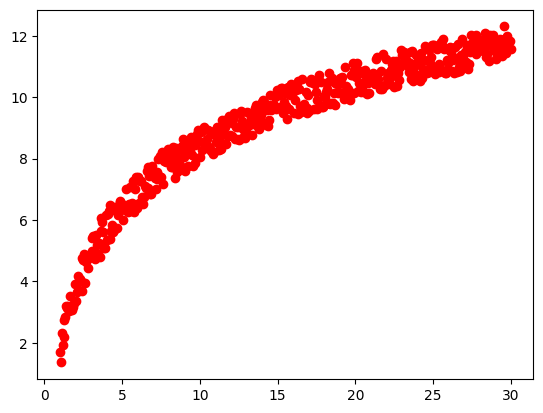

In [401]:
import random as rnd

def noisy_model(x, model, params, noise):
  return [model(xi, *params) + rnd.uniform(-noise, noise) for xi in x]

x = np.linspace(1, 30, 500)

true_system_parameters = [3, 2, -0.5] # put as many values as your model function requires (can have some set to zero if needed)
y = noisy_model(x, model_2, true_system_parameters, 0.6)

plt.scatter(x, y, color = 'red')
plt.show()

Let's optimize the parameters.

In [402]:
param, param_cov = opt.curve_fit(model_2, x, y)

param

<ipython-input-391-9f3408e7fd2c>:7: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x) + c


array([2.97769589, 1.38989983, 0.6332546 ])

Do these match the ones you set for the model function above?

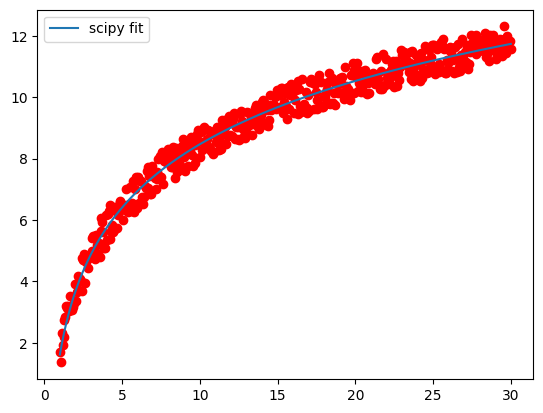

In [403]:
plt.scatter(x, y, color = 'red')

model_domain = np.linspace(np.min(x), np.max(x), len(x)*5) # You can edit this domain as you please
plt.plot(model_domain, model_2(model_domain, *param), label = 'scipy fit')
plt.legend()
plt.show()

There are two ways to improve the accuracy of the curve fitting. You can either "take more measurments" or reduce the noise. Go back and try changing these settings to see what happens.